# Function to plot automatic significance bars for boxplots
Bryan Lusse 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
## Generating input data
dataset = np.array([np.random.randint(0,100,10),
                    np.random.randint(50,70,10),
                    np.random.randint(0,50,10)]).transpose()
df = pd.DataFrame(dataset, columns=['Experiment 1','Experiment 2','Experiment 3'])
df.head()

,Experiment 1,Experiment 2,Experiment 3
0,87,55,48
1,46,56,7
2,45,57,1
3,89,59,28
4,69,50,17


Text(0.5, 1.0, 'Experiment Results')

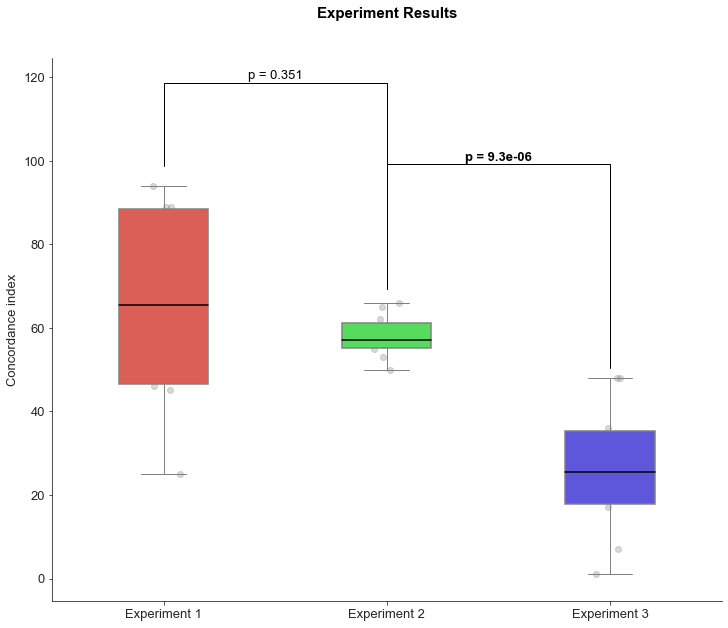

In [3]:
def significance_bars(dataframe, comparelist, width=0.5, min_val=0, max_val=10):
    """
    Function to plot boxplots with bars that show significance, i.e. p-values for t-tests between different experiments.
    Plots can still be edited outside of function (labels, tick sizes etc.)
    
    Inputs:
    - dataframe = Pandas dataframe with experiment results in the rows and different esperiments in columns
    - comparelist = locations of columns that should be compared and have p-values printed
    - width (optional) = width of boxplots (default = 0.5)
    - min_val (optional) = minimum value of experiments (default = 0)
    - max_val (optional) = maximum value of experiments (default = 10)
    
    Bryan Lusse 2020
    
    """
    # Calculating p values
    pvalues = []
    for comparison in comparelist:
        t,p = stats.ttest_ind(dataframe.iloc[:,comparison[0]],dataframe.iloc[:,comparison[1]])
        pvalues.append(p)
    
    # Visualizing individual measurements
    vals, names, xs = [],[],[]
    for i, col in enumerate(dataframe.columns): 
        vals.append(dataframe[col].values)
        names.append(col)
        xs.append(np.random.normal(i + 1, 0.04, dataframe[col].values.shape[0]))  # adds jitter to the data points - can be adjusted
    
    # Setting plot style
    sns.set_style("ticks")  
    boxprops = dict(linestyle='-', linewidth=1.5, color='grey')
    flierprops = dict(marker='o', markersize=1,linestyle='none')
    whiskerprops = dict(color='grey')
    capprops = dict(color='grey')
    medianprops = dict(linewidth=1.5, linestyle='-', color='black')
    
    
    # Actual plotting
    plt.figure(figsize=(12,10))
    shape = dataframe.shape[1]
    palette = sns.color_palette("hls",shape)
    pos = np.array(range(1,shape+1))
    pos = pos+0.5
    
    width_list = np.ones(dataframe.shape[1])*width
    
    box = plt.boxplot(vals, labels=names, notch=False, boxprops=boxprops, whiskerprops=whiskerprops,capprops=capprops, flierprops=flierprops, medianprops=medianprops,showmeans=False,patch_artist=True, widths=(0.4, 0.4, 0.4)) 
    for x, val in zip(xs, vals):
        plt.scatter(x, val, alpha=0.3, color='grey')
    for patch, color in zip(box['boxes'], palette):
        patch.set_facecolor(color)

    # Statistical annotation
    hlist = np.linspace(max_val*0.2,max_val*0.4,shape)
    for l, comparison in enumerate(comparelist):
        x1,x2 = np.array(comparison)+1
        y1 = max(dataframe.iloc[:,comparison[0]])*1.05
        y2 = max(dataframe.iloc[:,comparison[1]])*1.05
        h = hlist[l]
        p = pvalues[l]
        plt.plot([x1, x1, x2, x2], [y1, y1+h, y1+h, y2], lw=1, c='k')  
        if p<0.001:
            plt.text((x1+x2)*.5, y1+h+.1, "p = %0.1e"%p, ha='center', va='bottom', color='k',size=13,fontweight='bold')    
        elif p<0.05:
            plt.text((x1+x2)*.5, y1+h+.1, "p = %4.3f"%p, ha='center', va='bottom', color='k',size=13,fontweight='bold')    
        else: 
            plt.text((x1+x2)*.5, y1+h+.1, "p = %4.3f"%p, ha='center', va='bottom', color='k',size=13)   

            
# Example of use           
comparelist = [[0,1],[1,2]]
significance_bars(df, comparelist, min_val = 0, max_val = 100)
plt.xticks(rotation=0,size=13)
plt.yticks(visible=True,size=13)
plt.ylabel('Concordance index',size=13)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Experiment Results',size=15,fontweight='bold',pad=40,color='black')